<a href="https://colab.research.google.com/github/jsb1jsb2/weather-forecast/blob/main/Copy_of_Weather_Forecast_ver1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Forecast Version 1-1

##1. Import library


라이브러리를 불러온다.

-numpy: NumPy("넘파이"라 읽는다)는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리이다. 여기서는 matplotlib를 이용하기 위해서 사용하였다.

-pandas: pandas는 데이터 조작 및 분석을 위한 Python 프로그래밍 언어 용으로 작성된 소프트웨어 라이브러리이다. 특히 숫자 테이블과 시계열 을 조작하기 위한 데이터 구조와 연산을 제공한다. 

-matplotlib: Matplotlib는 Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리이다. (간단히 말하면 그래프 그리는 lib이다.)

-tensorflow: machine learning을 위한 lib이다.

-io: input and output module

-time, datetime: 시간을 다루기 위한 lib이다. 

-from google.colab import files: 컴퓨터에서 file을 불러오기 위한 module이다.**bold text**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import io, time, datetime
from google.colab import files


##2. Import Data


학습시킬 Data를 local에서 불러오는 과정이다. (날씨 데이터가 여기 담겨져 있다.)

CSV 파일로 불러올 것이다.
(CSV: comma-separated values는 몇 가지 필드를 쉼표(,)로 구분한 텍스트 데이터 및 텍스트 파일이다.) 

아래 자료는 기상청 기상자료개방포털([link text](https://data.kma.go.kr))에서 가져온 Data이며 하루동안의 기온값이 5분간격으로 기록되어 있다. 

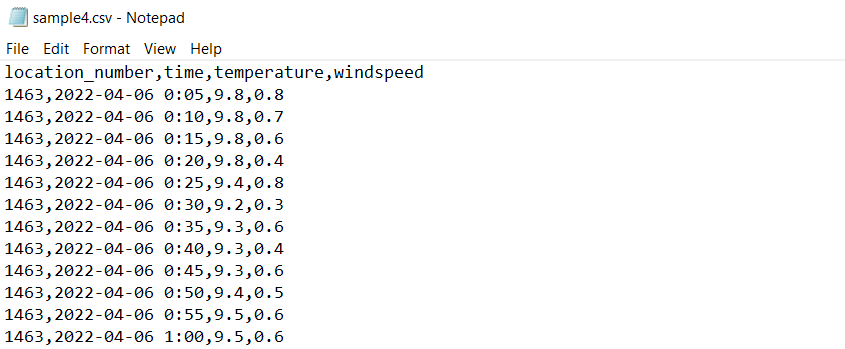

In [ ]:
data = files.upload()

Saving sample4.csv to sample4.csv


##3. Convert CSV file to DataFrame


위에서 보았던 CSV 파일을 불러오는 과정이다. 

기본적일 과정은 모두 주석으로 설명하였다. 가운데 초록색 #이 주석이다. (주석을 Code에 영향을 미치지 않으며 단순히 설명하기 위한 text일 뿐이다.)

한글이 있어서 혹시모를 decoding 오류를 피하기 위해 uni-16이 아닌 cp949로 decoding 해주었다. 

중간부분은 모두 Data Frame을 가져오는 과정이다.

중간의 시간과 관련된 부분은 CSV 파일에서 문자열 형태였던 시간을 모두 숫자로 바꾸어 주는 과정이다. 'Year-Month-Day Hour:Minute'의 문자열을 time module로 바꾸어주는 과정이다.(이렇게 time module로 바꾸면 쉽게 숫자로 변환할 수도, 바로 날짜, 시간, 분, 초 등 원하는 형태로 가지고 올 수 있다.)

그다음 for문으로 하고자 한 것은 시간을 분단위의 정수로 바꾸어 주는 것이다. integer로 Value = Hour*60+Minute 으로 예를들어 04시 30분이면 04*60+30=270 으로 바꾸는 것이다. 

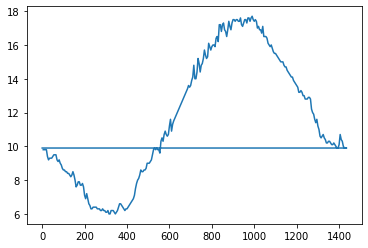

In [ ]:
#csv 파일 읽어와서 df로 저장, 이때 pd.read_csv가 바로 읽지 못하므로 StringIO로 객체로 변환시킨 후 불러와야 한다. 
df = pd.read_csv(io.StringIO(data['sample4.csv'].decode('cp949')))

#location_number, temperature, windspeed, time Column 지정
location_number = df.location_number
temperature = df.temperature
windspeed = df.windspeed
time1 = df.time

#빈 문자열 생성
time2 = []

#location_number = np.array(location_number) - not needed but will be used in code considering location

#time2에 정수형태의 시간 추가 
for i in range(0, len(time1)):
  time2.append(int((datetime.datetime.strptime(time1[i], '%Y-%m-%d %H:%M')).hour)*60+int((datetime.datetime.strptime(time1[i], '%Y-%m-%d %H:%M')).minute))

#데이터프레임에 timestamp를 생성한 후 그곳에 time2 list를 넣음.
df['timestamp'] = time_time

#이 코드는 plot이다. (시간에 따른 기온 data를 볼 수 있다.)
#matplot은 numpy module의 array를 지원해줌으로 모두 np의 array로 변환시킨다.
temperature = np.array(temperature)
time2 = np.array(df.timestamp)
plt.plot(time2, temperature)



##4. Data Preprocessing for tensorflow

Tensorflow 실행을 위한 데이터 전처리 과정이다. 이부분의 Code를 작성하면서 많은 공부가 필요하다고 느꼈다. Data를 어떻게 처리하느냐에따라 그 loss값의 많은 차이 발생하였다. 다시한번 말하지만 필자는 여기서 쓰이는 신경망 함수에 대한 개념이 전무하다(언제, 왜, 어떻게 쓰이는지도 모른다.).여러가지 다른 사람의 Code를 참고하고, 이를 조금씩 찾아보면서 이런 간단한 Data 분석에서 가장 많이 사용하는 Function을 참고하였다.

In [ ]:
#독립변수와 종속변수 설정
#독립변수는 feature, 종속변수는 target
feature = df[['timestamp']]
target = df[['temperature']]

#print(feature.shape, target.shape) -clarify feature and target format

In [ ]:
#신경망 구성 단계
X = tf.keras.layers.Input(shape=[1])
H = tf.keras.layers.Dense(5, activation='swish')(X)
H_1 = tf.keras.layers.Dense(5, activation='swish')(H)
H_2 = tf.keras.layers.Dense(5, activation='swish')(H_1)
Y = tf.keras.layers.Dense(1, activation='swish')(H_2)

#model 생성 및 compile (여기서 optimize, loss, metrics에서 data와 구하는 것에 맞는 함수를 사용해야함. 잘 모르겠음)
model = tf.keras.models.Model(X,Y)
model.compile(optimizer ='adam', loss='mse', metrics=['accuracy'])

#model 구조 확인
model.summary()


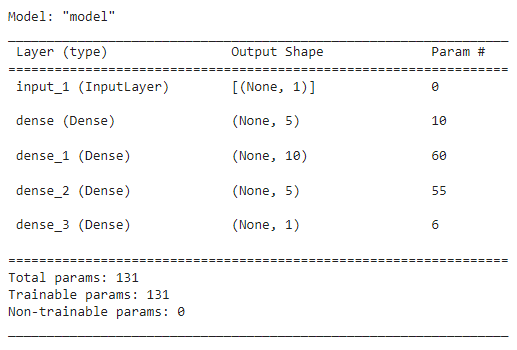
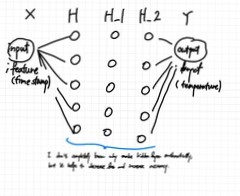

#5. Fit Model and Loss Analysis

In [ ]:
# model 실행
# model.fit(독립변수, 종속변수, epoch 횟수, 출력형태)
hist = model.fit(feature, target, epochs=500, verbose=1)

# validation_data=(feature, target)


#loss 그래프 확인
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
print(model.predict([900]))

[[11.540772]]


In [ ]:
#Validation
#00시 05분 부터 5분간격으로 data 예측 temp에 list 형태로 저장 
temp=[]
for i in range(5,1381,5):
  temp.append(float(model.predict([i])))

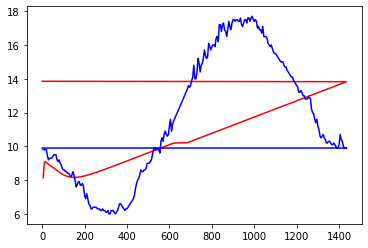

In [ ]:
#그래프 표시

temp = np.array(temp)

plt.plot(time2, temp, 'r')
plt.plot(time2, temperature, 'b')